# Using the hillmaker CLI

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import hillmaker as hm

## Running hillmaker via the command line interface (CLI)

To run hillmaker from the command line, make sure that you are using whatever virtual environment within which hillmaker is installed. Let's see the help for hillmaker's CLI:

```bash
> hillmaker -h
```

In [3]:
!hillmaker -h

usage: hillmaker [--scenario_name SCENARIO_NAME] [--data DATA]
                 [--in_field IN_FIELD] [--out_field OUT_FIELD]
                 [--start_analysis_dt START_ANALYSIS_DT]
                 [--end_analysis_dt END_ANALYSIS_DT] [--config CONFIG]
                 [--cat_field CAT_FIELD] [--bin_size_minutes BIN_SIZE_MINUTES]
                 [--cats_to_exclude [CATS_TO_EXCLUDE ...]]
                 [--occ_weight_field OCC_WEIGHT_FIELD]
                 [--percentiles [PERCENTILES ...]] [--los_units LOS_UNITS]
                 [--csv_export_path CSV_EXPORT_PATH] [--no_dow_plots]
                 [--no_week_plots] [--plot_export_path PLOT_EXPORT_PATH]
                 [--plot_style PLOT_STYLE] [--figsize FIGSIZE FIGSIZE]
                 [--bar_color_mean BAR_COLOR_MEAN] [--alpha ALPHA]
                 [--plot_percentiles PLOT_PERCENTILES [PLOT_PERCENTILES ...]]
                 [--pctile_color PCTILE_COLOR [PCTILE_COLOR ...]]
                 [--pctile_linestyle PCTILE_LINESTYLE

There are several required arguments: 

- SCENARIO_NAME - a scenario name, 
- DATA - the path to the csv file containing the stop data, 
- IN_FIELD, OUT_FIELD - the field names containing the arrival times and the departure times, 
- START_ANALYSIS_DT, END_ANALYSIS_DT - starting and ending dates for the analysis.

There are also numerous optional arguments controlling how hillmaker works and which outputs are created.

See {doc}`using_make_hills` for detailed information on each of the options listed above.

See {doc}`getting_started` for basic usage of the hillmaker CLI.

In this document we just want to mention a few things that are unique to the CLI and differ from the Python APIs.

### Plot related arguments not available through the CLI

There are a few plot related arguments such as `main_title_properties`, `subtitle_title_properties` and `legend_properties` that are not available through the CLI. The reason for this is that these arguments require Python dictionaries as their data type. If you want to use the CLI and to use these input parameters, you can use the `--config CONFIG` option to include a TOML formatted configuration file as one of the inputs to the CLI. Any input parameters set through the config file will be overridden by values set via command line arguments.

For example, here is the contents of `./data/cli_example.toml`.

```
[settings]
main_title_properties = {loc = 'left', fontsize = 14}
subtitle_properties = {loc = 'left', style = 'normal'}
legend_properties = {loc = 'right', frameon = true, facecolor = 'w'}
```

```{warning}
You MUST include the `[settings]` section header.
```

### Running hillmaker

Now we can run hillmaker from the command line:

```bash
> hillmaker --scenario cli_example --data ./data/ssu_2024.csv \
--in_field InRoomTS --out_field OutRoomTS --cat_field PatType --bin_size_minutes 60 \
--start_analysis_dt 2024-01-02 --end_analysis_dt 2024-03-30 \
--csv_export_path output --plot_export_path output --ylabel Patients \
--config input/cli_example.toml
```


In [6]:
!hillmaker --scenario cli_example --data ./data/ssu_2024.csv \
--in_field InRoomTS --out_field OutRoomTS --cat_field PatType --bin_size_minutes 60 \
--start_analysis_dt 2024-01-02 --end_analysis_dt 2024-03-30 \
--csv_export_path output --plot_export_path output --ylabel Patients \
--config input/cli_example.toml


2023-11-14 12:16:10,627 - hillmaker.hills - INFO - Starting scenario cli_example
2023-11-14 12:16:16,941 - hillmaker.summarize - INFO - Created nonstationary summaries - ['PatType']
2023-11-14 12:16:17,919 - hillmaker.summarize - INFO - Created nonstationary summaries - []
2023-11-14 12:16:17,959 - hillmaker.summarize - INFO - Created stationary summaries - ['PatType']
2023-11-14 12:16:17,984 - hillmaker.summarize - INFO - Created stationary summaries - []
2023-11-14 12:16:19,088 - hillmaker.hills - INFO - bydatetime and summaries by datetime created (seconds): 8.9452
2023-11-14 12:16:19,159 - hillmaker.hills - INFO - By datetime exported to csv in output (seconds): 0.0711
2023-11-14 12:16:19,226 - hillmaker.hills - INFO - Summaries exported to csv in output (seconds): 0.0668
2023-11-14 12:16:21,153 - hillmaker.plotting - INFO - Full week plots created (seconds): 2.7815
2023-11-14 12:16:29,577 - hillmaker.plotting - INFO - Individual day of week plots created (seconds): 14.4023
2023-11

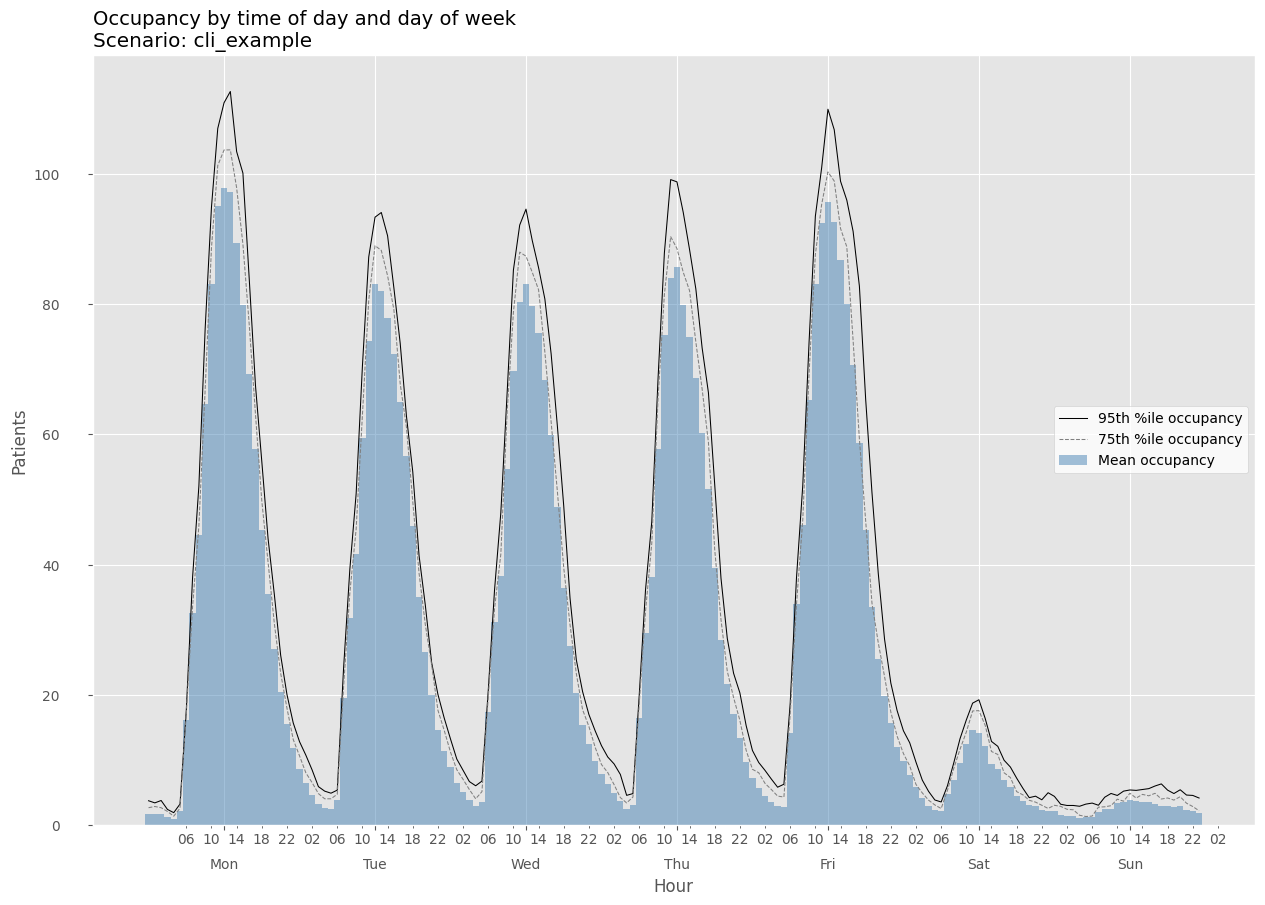

In [7]:
from IPython.display import Image
Image('output/cli_example_occupancy_week.png')

## Controlling plot creation

By default, all plots are automatically created and exported to `PLOT_EXPORT_PATH`. To suppress either the daily and/or weekly plots, use these arguments:

```bash
  --no_dow_plots        If set, no day of week plots are created.
  --no_week_plots       If set, no weekly plots are created.
```